* Segmentation de la page
* contours dans les segments
  * Aligment
  * Tracer des lignes entre les contours et traiter comme tableau classique

In [5]:
from PIL import Image as PILImage
from img2table.document import Image
from img2table.ocr import TesseractOCR
from img2table.tables.processing.common import get_contours_cell
from img2table.tables.processing.lines import detect_lines
from img2table.tables.objects.cell import Cell
from colordict import ColorDict
import cv2
import numpy as np

In [6]:
import random
colors = ColorDict()

def get_color():
    idx = random.randint(0, len(colors) - 1)
    return list(colors.values())[idx]

### Preprocessing

In [140]:
img = Image(r"C:\Users\xavca\Pictures\test_1.png")
ocr = TesseractOCR()
ocr_df = ocr.of(img)
dpi = 300

img = list(img.images)[0]


display_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)

denoised = cv2.GaussianBlur(img, (3, 3), 0)
thresh = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10)

### Page segmentation

15


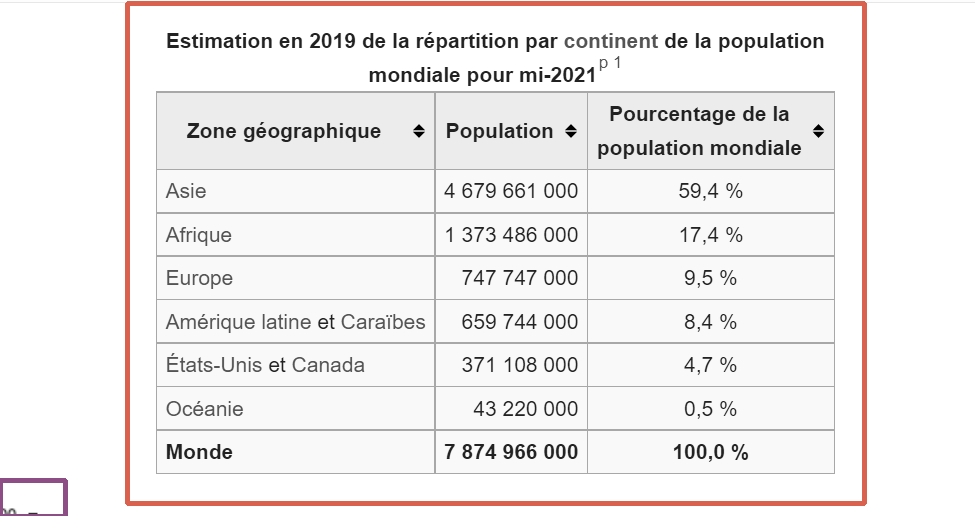

In [141]:
display_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)

height, width = thresh.shape
cell = Cell(0, 0, width, height)

kernel_size = round(((height * width) / 150) ** float(1/3))
print(kernel_size)

page_segments = get_contours_cell(img=thresh,
                                  cell=cell,
                                  margin=0,
                                  blur_size=9,
                                  kernel_size=kernel_size,
                                  merge_vertically=None)

for cell in page_segments:
    cv2.rectangle(display_img, (cell.x1, cell.y1), (cell.x2, cell.y2), get_color(), 3)
    
PILImage.fromarray(display_img)

### Contours processing to find cells

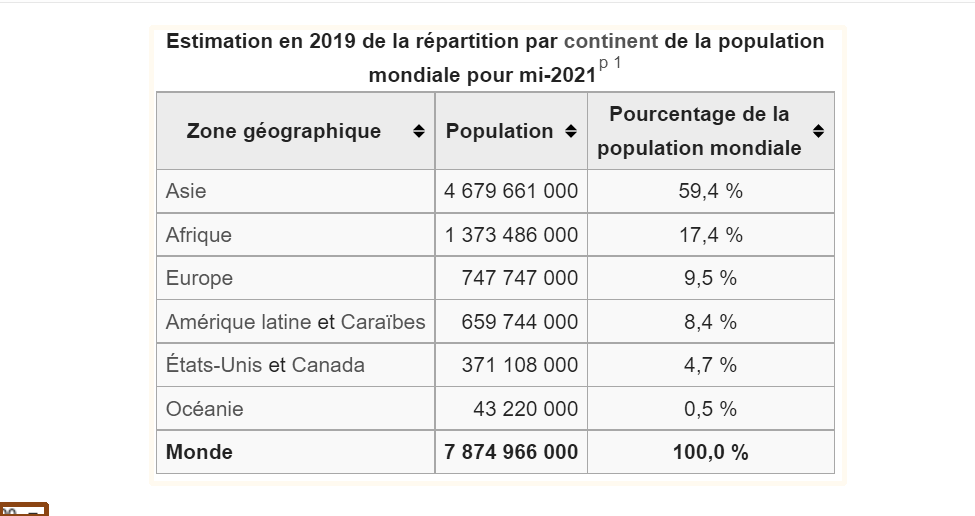

In [146]:
display_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)

# Enlever les lignes avant cette étape
for segment in page_segments:
    contours = get_contours_cell(img=thresh,
                                 cell=segment,
                                 margin=0,
                                 blur_size=3,
                                 kernel_size=round(((height * width) / 150) ** float(1/3) / 4),
                                 merge_vertically=None)
    
    for cell in contours:
        cv2.rectangle(display_img, (cell.x1, cell.y1), (cell.x2, cell.y2), get_color(), 3)
    
PILImage.fromarray(display_img)